# NYC Taxi Fare Prediction

### **Table of Contents**
1. Download data
2. Read data using Pandas
3. Exploratory data anaysis and data cleaning
4. Feature engineering 
5. Understand temporal feature conversions 
6. Machine learning with TensorFlow
7. Todo
8. Todo
9. ...

## Import packages

In [24]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline

## 1. Download data
Download data using ```wget```. A large volume of data is available at https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page, but we are going to use only ```yellow_tripdata_2020-06.csv```, which has 499,000 data points. 


In [ ]:
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-02.csv
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-03.csv
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-04.csv
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-05.csv
# !wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-06.csv

## 2. Read data using Pandas

Let's try to peek the data using ```head``` method. The definition of each column names can be found from [here](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf). Also note that ```PULocationID``` and ```DOLocationID``` indicate pickup and dropoff zones. More details can be checked from [here](https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv).

In [25]:
data = pd.read_csv('./yellow_tripdata_2020-06.csv')
data.head()

/home/wooram/anaconda3/envs/tf2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-06-01 00:31:23,2020-06-01 00:49:58,1.0,3.6,1.0,N,140,68,1.0,15.5,3.0,0.5,4.00,0.0,0.3,23.30,2.5
1,1.0,2020-06-01 00:42:50,2020-06-01 01:04:33,1.0,5.6,1.0,N,79,226,1.0,19.5,3.0,0.5,2.00,0.0,0.3,25.30,2.5
2,1.0,2020-06-01 00:39:51,2020-06-01 00:49:09,1.0,2.3,1.0,N,238,116,2.0,10.0,0.5,0.5,0.00,0.0,0.3,11.30,0.0
3,1.0,2020-06-01 00:56:13,2020-06-01 01:11:38,1.0,5.3,1.0,N,141,116,2.0,17.5,3.0,0.5,0.00,0.0,0.3,21.30,2.5
4,1.0,2020-06-01 00:16:41,2020-06-01 00:29:30,1.0,4.4,1.0,N,186,75,1.0,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5


## 3. Exploratory data analysis

```describe``` is a very useful method to get summary statistics for the numeric fields of the data. Clearly, there is something wrong with the data
* Different ```count``` values of each column

In [26]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,499043.000000,499043.000000,549760.000000,499043.000000,549760.000000,549760.000000,499043.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000
mean,1.598351,1.356148,4.104275,1.047214,157.636474,153.473989,1.373327,13.606734,1.023772,0.491298,1.762904,0.367066,0.296980,18.768912,1.967681
std,0.490232,1.016665,336.024280,1.095790,69.756787,73.842217,0.531616,13.521364,1.263818,0.080832,2.631495,1.751982,0.041437,15.178965,1.044792
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-216.000000,-4.500000,-0.500000,-36.300000,-28.750000,-0.300000,-216.300000,-2.500000
25%,1.000000,1.000000,1.010000,1.000000,107.000000,87.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.700000,2.500000
50%,2.000000,1.000000,1.860000,1.000000,151.000000,151.000000,1.000000,9.000000,0.500000,0.500000,1.500000,0.000000,0.300000,14.160000,2.500000
75%,2.000000,1.000000,3.660000,1.000000,234.000000,233.000000,2.000000,15.500000,2.500000,0.500000,2.750000,0.000000,0.300000,20.800000,2.500000
max,2.000000,9.000000,220386.230000,99.000000,265.000000,265.000000,5.000000,941.500000,87.560000,3.300000,422.680000,114.750000,0.300000,1141.100000,2.500000


Let's remove invalid instances (rows) using ```dropna```, and we have a consistent number of instances. 

In [27]:
clean_data = data.dropna().dropna()
clean_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.00000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000,499043.000000
mean,1.598351,1.356148,2.864602,1.047214,160.197672,155.456091,1.373327,11.844105,1.12473,0.491592,1.772877,0.221110,0.296680,17.027168,2.103727
std,0.490232,1.016665,32.119857,1.095790,68.832677,73.466849,0.531616,11.449169,1.28302,0.081359,2.696115,1.368441,0.043455,13.431950,0.939306
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-216.000000,-4.50000,-0.500000,-36.300000,-28.750000,-0.300000,-216.300000,-2.500000
25%,1.000000,1.000000,1.000000,1.000000,107.000000,90.000000,1.000000,6.000000,0.00000,0.500000,0.000000,0.000000,0.300000,10.300000,2.500000
50%,2.000000,1.000000,1.710000,1.000000,161.000000,153.000000,1.000000,8.500000,0.50000,0.500000,1.500000,0.000000,0.300000,13.560000,2.500000
75%,2.000000,1.000000,3.140000,1.000000,234.000000,234.000000,2.000000,13.500000,2.50000,0.500000,2.650000,0.000000,0.300000,18.950000,2.500000
max,2.000000,9.000000,22543.990000,99.000000,265.000000,265.000000,5.000000,941.500000,87.56000,3.300000,422.680000,114.750000,0.300000,1141.100000,2.500000


Now, let's use a basic intuition that there should be correlation between ```trip_distance``` and ```fare_amount```, but the scatter does not show what is expected. It is because..
* Zero value for ```passenger_count```
* Zero value for ```trip_distance```
* Negative ```fare_amount```, ```extra```, ```mta_tax```, etc.

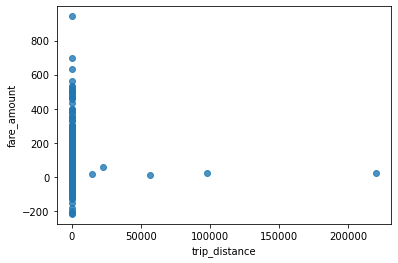

In [28]:
ax = sb.regplot(x="trip_distance", y='fare_amount', fit_reg=False, ci=None, truncate=True, data=data)

Again, let's remove invalid instances (rows) or outliers, and it looks good.

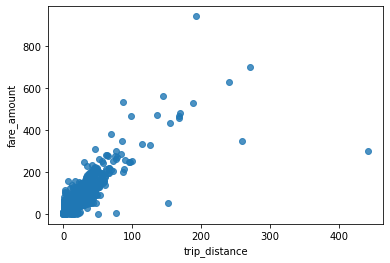

In [29]:
clean_data = clean_data[clean_data['total_amount'] > 0]
clean_data = clean_data[clean_data['trip_distance'] > 0]
clean_data = clean_data[clean_data['trip_distance'] < 10000]
clean_data = clean_data[clean_data['passenger_count'] > 0]
clean_data = clean_data[clean_data['fare_amount'] > 0]
clean_data['fare_per_dist'] = clean_data['fare_amount'].div(clean_data['trip_distance'].values)
clean_data = clean_data[clean_data['fare_per_dist'] < 100]
ax = sb.regplot(x="trip_distance", y='fare_amount', fit_reg=False, ci=None, truncate=False, data=clean_data)

It now looks good

In [31]:
v1 = clean_data[clean_data['VendorID']==1]
v2 = clean_data[clean_data['VendorID']==2]
print('VendorID1, average fare/mile=%.3f' % v1['fare_amount'].div(v1['trip_distance'].values).mean())
print('VendorID2, average fare/mile=%.3f' % v2['fare_amount'].div(v2['trip_distance'].values).mean())

print('VendorID1, average tip/mile=%.3f' % v1['tip_amount'].div(v1['trip_distance'].values).mean())
print('VendorID2, average tip/mile=%.3f' % v2['tip_amount'].div(v2['trip_distance'].values).mean())

print('VendorID1, average tip/fare=%.3f' % v1['tip_amount'].div(v1['fare_amount'].values).mean())
print('VendorID2, average tip/fare=%.3f' % v2['tip_amount'].div(v2['fare_amount'].values).mean())

for i in range(1, 7):
    tmp1 = v1[v1['passenger_count']==i]    
    print('VendorID1, %d passenger, average fare/mile=%.3f ' % (i, tmp1['fare_amount'].div(tmp1['trip_distance'].values).mean()))
    
for i in range(1, 7):
    tmp2 = v2[v2['passenger_count']==i]
    print('VendorID2, %d passenger, average fare/mile=%.3f ' % (i, tmp2['fare_amount'].div(tmp2['trip_distance'].values).mean()))

VendorID1, average fare/mile=5.399
VendorID2, average fare/mile=5.210
VendorID1, average tip/mile=0.959
VendorID2, average tip/mile=0.925
VendorID1, average tip/fare=0.175
VendorID2, average tip/fare=0.176
VendorID1, 1 passenger, average fare/mile=5.411 
VendorID1, 2 passenger, average fare/mile=5.352 
VendorID1, 3 passenger, average fare/mile=5.207 
VendorID1, 4 passenger, average fare/mile=5.108 
VendorID1, 5 passenger, average fare/mile=4.952 
VendorID1, 6 passenger, average fare/mile=4.955 
VendorID2, 1 passenger, average fare/mile=5.218 
VendorID2, 2 passenger, average fare/mile=5.176 
VendorID2, 3 passenger, average fare/mile=5.238 
VendorID2, 4 passenger, average fare/mile=5.119 
VendorID2, 5 passenger, average fare/mile=5.221 
VendorID2, 6 passenger, average fare/mile=5.164 


Some of the features(columns) are unknown at inference, and those should be not be input features. Here I set ```fare_amount``` and ```tolls_amount``` as the output of this project.

In [34]:
input_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime','passenger_count','VendorID','PULocationID','DOLocationID']
output_cols = ['fare_amount','tolls_amount']

input_data = clean_data[fare_model_input_cols].copy()
output_data = clean_data[fare_model_output_cols].copy()

## 4. Feature Engineering
Convert ```tpep_pickup_datetime``` and ```tpep_dropoff_datetime``` features to ```year```, ```month```, ```day```, ```hour```

In [36]:
input_data['tpep_pickup_datetime'] = pd.to_datetime(input_data['tpep_pickup_datetime'])
input_data['PU_year'] = input_data['tpep_pickup_datetime'].dt.year
input_data['PU_month'] = input_data['tpep_pickup_datetime'].dt.month
input_data['PU_day'] = input_data['tpep_pickup_datetime'].dt.day
input_data['PU_hour'] = input_data['tpep_pickup_datetime'].dt.hour
del input_data['tpep_pickup_datetime']
input_data['tpep_dropoff_datetime'] = pd.to_datetime(input_data['tpep_dropoff_datetime'])
input_data['DO_year'] = input_data['tpep_dropoff_datetime'].dt.year
input_data['DO_month'] = input_data['tpep_dropoff_datetime'].dt.month
input_data['DO_day'] = input_data['tpep_dropoff_datetime'].dt.day
input_data['DO_hour'] = input_data['tpep_dropoff_datetime'].dt.hour
del input_data['tpep_dropoff_datetime']

1

# In progress...